In [38]:
import pandas as pd
import numpy as np

In [139]:
# --- DATA EXTRACTED FROM YAHOO FINANCE ---
tsla = pd.read_csv('TSLA.csv')

tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600
1,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
2,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
3,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
4,2022-09-16,299.609985,303.709991,295.600006,303.350006,303.350006,87087800
...,...,...,...,...,...,...,...
246,2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600
247,2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800
248,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900
249,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700


## Preparando los datos

In [68]:
tsla.set_index(pd.DatetimeIndex(tsla['Date']), inplace=True)
tsla = tsla[['Adj Close']]

print(tsla)

             Adj Close
Date                  
2022-09-12  304.420013
2022-09-13  292.130005
2022-09-14  302.609985
2022-09-15  303.750000
2022-09-16  303.350006
...                ...
2023-09-05  256.489990
2023-09-06  251.919998
2023-09-07  251.490005
2023-09-08  248.500000
2023-09-11  267.239990

[251 rows x 1 columns]


## Visualizando los datos

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

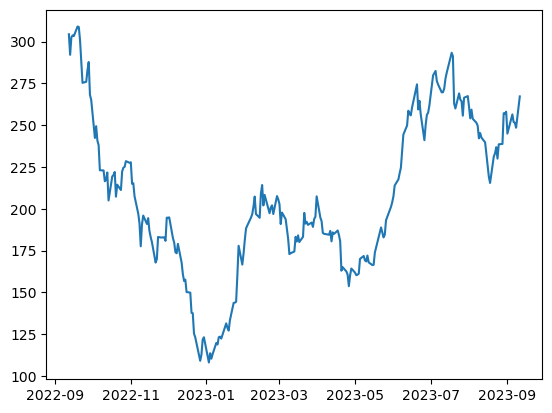

In [71]:
plt.plot(tsla.index, tsla['Adj Close'])

plt.show()

## Agregando indicadores

In [78]:
import pandas_ta

tsla.ta.ema(close='adj_close', length=10, append=True)

[X] Ooops!!! It's True, the series 'adj_close' was not found in Adj Close, EMA_10


,Adj Close,EMA_10
Date,,
2022-09-12,304.420013,NaN
2022-09-13,292.130005,NaN
2022-09-14,302.609985,NaN
2022-09-15,303.750000,NaN
2022-09-16,303.350006,NaN
...,...,...
2023-09-05,256.489990,247.251419
2023-09-06,251.919998,248.100252
2023-09-07,251.490005,248.716570


In [83]:
# Cleaning NaN values
tsla = tsla.iloc[10:]

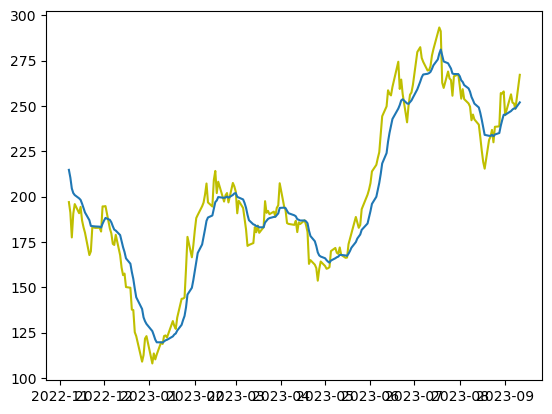

In [92]:
plt.plot(tsla.index, tsla['Adj Close'], '-y', tsla['EMA_10'])

plt.show()

## Preparando datos de test

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
# Split data into testing and training sets
# The test size 0.20 (20%) 
# Was specified as an argument to the train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(
    tsla[['Adj Close']], tsla[['EMA_10']], 
test_size=.2)

In [101]:
# Test set
print(X_test.describe())

        Adj Close
count   43.000000
mean   205.719303
std     42.765247
min    108.099998
25%    181.849998
50%    197.580002
75%    243.994995
max    271.989990


In [135]:
# Training set
print(X_train.describe())

        Adj Close
count  168.000000
mean   198.183154
std     45.239596
min    109.099998
25%    170.022500
50%    190.195000
75%    238.647499
max    293.339996


## Entrenando el modelo

In [125]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# trainning
model.fit(X_train, y_train)

# making the prediction
y_pred = model.predict(X_test)

## Validando el fit

In [109]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[0.9069203]]
Mean Absolute Error: 8.904260328914445
Coefficient of Determination: 0.9235036930703031


## Interpretacion

At this point, we’ve trained a model on historical pricing data using the Adjusted Closing value and the Exponential Moving Average for a 10-day trading period. Our goal was to develop a model that can use the EMA of any given day (dependent on pricing from the previous 9 days) and accurately predict that day’s closing price. Let’s run a simulation of a very simple trading strategy to assess how well we might have done using this.

Strategy: If our model predicts a higher closing value than the opening value we make a trade for a single share on that day—buying at market open and selling just before market close.